## Crosstab - Cross Tabulation
Fornece um resumo tabular da distribuição de frequência de duas variáveis, permitindo-nos ver a relação entre elas e identificar quaisquer padrões ou tendências.

Esta função permite calcular uma tabela de frequência de duas ou mais variáveis, que resume a distribuição dos valores nos dados e fornece insights sobre as relações entre as variáveis. A tabulação cruzada (ou crosstab) é uma ferramenta importante para analisar duas variáveis ​​categóricas em um conjunto de dados.

Uma tabela de frequência é uma tabela que mostra a distribuição de valores em um conjunto de dados, contando o número de ocorrências de cada valor. Por exemplo, suponha que temos um conjunto de dados de alunos que contém informações sobre gênero e nível de escolaridade. Uma tabela de frequência de gênero e nível de escolaridade resumiria o número de alunos do sexo masculino e feminino em cada categoria de nível de escolaridade.

O uso básico da função crosstab() é o seguinte:

pd.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', dropna=True, normalize=False)

Onde:

-index: Um objeto em forma de sequência ou matriz que define as linhas da tabela de frequência. Este parâmetro pode ser um único nome de coluna, uma lista de nomes de colunas ou uma matriz de valores.

-columns: Um objeto em forma de sequência ou matriz que define as colunas da tabela de frequência. Este parâmetro pode ser um único nome de coluna, uma lista de nomes de colunas ou uma matriz de valores.

-values: Um parâmetro opcional que especifica os valores a serem agregados na tabela de frequência. Este parâmetro pode ser um único nome de coluna, uma lista de nomes de colunas ou uma matriz de valores. Se não for fornecido, a função contará o número de ocorrências de cada combinação de valores no índice e nas colunas.

-rownames: Um parâmetro opcional que especifica os nomes das linhas na tabela de frequência. Este parâmetro pode ser uma única string ou uma lista de strings.

-colnames: Um parâmetro opcional que especifica os nomes das colunas na tabela de frequência. Este parâmetro pode ser uma única string ou uma lista de strings.

-aggfunc: Um parâmetro opcional que especifica a função de agregação a ser aplicada aos valores na tabela de frequência. Este parâmetro pode ser uma string ou um objeto chamável que recebe uma sequência de valores e retorna um valor escalar. Se não for fornecido, a função contará o número de ocorrências de cada combinação de valores no índice e nas colunas.

-margins: Um parâmetro opcional que especifica se as margens de linha e coluna devem ser calculadas na tabela de frequência. Se definido como True, a função adicionará uma linha e uma coluna à tabela que mostra os totais marginais. O valor padrão é False.

-dropna: Um parâmetro opcional que especifica se as linhas e colunas que contêm valores ausentes (valores NaN) devem ser removidas da tabela de frequência. Se definido como True, a função removerá as linhas e colunas que contêm valores ausentes. O valor padrão é True.

-normalize: Um parâmetro opcional que especifica se a tabela de frequência deve ser normalizada dividindo os valores pelo total geral. Se definido como True, a função normalizará a tabela dividindo cada valor pela soma de todos os valores. O valor padrão é False.

### Exemplo 1: Criando um Crosstab simples
Vamos começar com um exemplo simples para criar uma tabela de tabulação cruzada com duas variáveis: gênero e nível de escolaridade. Usaremos um conjunto de dados de alunos que contém informações sobre gênero, nível de escolaridade e notas em testes.

In [1]:
import pandas as pd

# criando um dataset
df = pd.DataFrame({
    'gender': ['male', 'male', 'female', 'female', 'male', 'female', 'male', 'female'],
    'education_level': ['high school', 'college', 'college', 'graduate', 'high school', 'graduate', 'college', 'graduate'],
    'score': [75, 82, 88, 95, 69, 92, 78, 85]
})

# Visualizando o dataframe
print(df)

   gender education_level  score
0    male     high school     75
1    male         college     82
2  female         college     88
3  female        graduate     95
4    male     high school     69
5  female        graduate     92
6    male         college     78
7  female        graduate     85


In [2]:
ct = pd.crosstab(df['gender'], df['education_level'])
ct

education_level,college,graduate,high school
gender,,,
female,1,3,0
male,2,0,2


Neste exemplo, criamos uma tabela de tabulação cruzada de gênero e nível de escolaridade passando a coluna gender como índice e a coluna education_level como colunas para a função crosstab(). A função conta o número de ocorrências de cada combinação de valores e retorna uma tabela que resume a distribuição de alunos por gênero e nível de escolaridade.

### Exemplo 2: Agregando valores
Além de contar o número de ocorrências de cada combinação de valores, a função crosstab() permite agregar outros valores na tabela. Por exemplo, você pode calcular a nota média dos alunos em cada combinação de gênero e nível de escolaridade.


In [4]:
ct_mean = pd.crosstab(df['gender'], df['education_level'], values=df['score'], aggfunc="mean")
ct_mean

education_level,college,graduate,high school
gender,,,
female,88.0,90.666667,NaN
male,80.0,NaN,72.0


Neste exemplo, adicionamos o parâmetro values ​​à função crosstab() e o definimos como a coluna score. Também adicionamos o parâmetro aggfunc e o definimos como "mean", que calcula a pontuação média dos alunos em cada combinação de gênero e nível educacional.

### Exemplo 3

Vamos agora utilizar o parâmetro margins. Com este parâmetro, se torna fácil a geração de subtotais da nossa tabela

In [5]:
import seaborn as sns
ct_margins = pd.crosstab(df['gender'], df['education_level'], margins=True)
ct_margins

education_level,college,graduate,high school,All
gender,,,,
female,1,3,0,4
male,2,0,2,4
All,3,3,2,8


Agora podemos criar um mapa de calor usando a função heatmap do seaborn

<Axes: xlabel='education_level', ylabel='gender'>

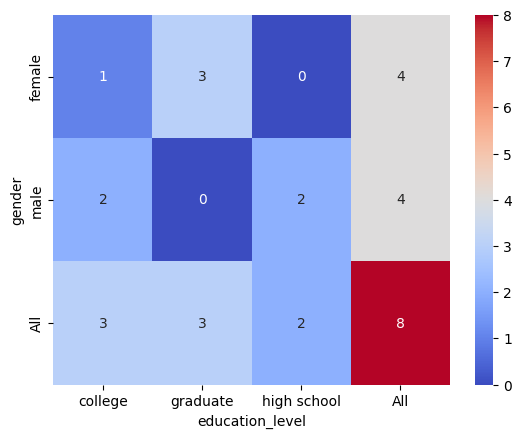

In [6]:
sns.heatmap(ct_margins, cmap='coolwarm', annot=True)

Neste exemplo, adicionamos o parâmetro margins à função crosstab() e o definimos como True. A tabela resultante inclui margens de linha e coluna que mostram as contagens totais para cada linha e coluna, bem como a contagem total geral para toda a tabela.

### Exemplo 4: Normalização
A função crosstab() também permite normalizar a tabela dividindo os valores pelo total geral. Isso pode ser útil para comparar as frequências relativas de diferentes combinações de variáveis.

In [7]:
ct_norm = pd.crosstab(df['gender'], df['education_level'], normalize=True, margins=True)
ct_norm

education_level,college,graduate,high school,All
gender,,,,
female,0.125,0.375,0.00,0.5
male,0.250,0.000,0.25,0.5
All,0.375,0.375,0.25,1.0


Neste exemplo, adicionamos o parâmetro normalize à função crosstab() e o definimos como True. A tabela resultante mostra as proporções de cada combinação de gênero e nível de escolaridade, normalizadas pela contagem total geral de todos os alunos.

### Exemplo 5: Visualização de dados
Vamos agora usar a função crosstab() para criar visualizações dos dados. Por exemplo, você pode criar um gráfico de barras empilhadas para mostrar a distribuição dos alunos por gênero e nível de escolaridade.

<Axes: xlabel='gender'>

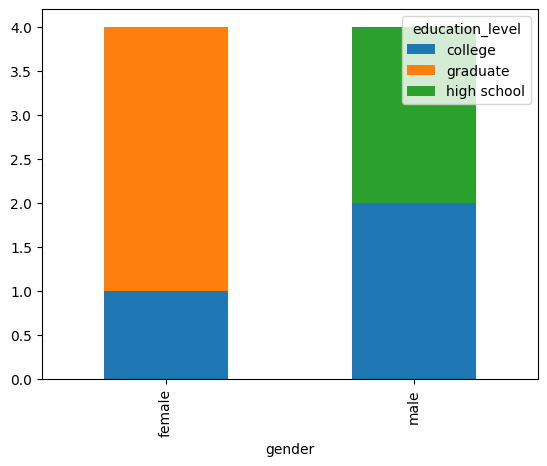

In [8]:
ct_viz = pd.crosstab(df['gender'], df['education_level'])
ct_viz.plot(kind='bar', stacked=True)

Neste exemplo, usamos a função plot() da tabela de tabulação cruzada para criar um gráfico de barras empilhadas que mostra a distribuição dos alunos por gênero e nível de escolaridade. O gráfico resultante é uma visualização útil que permite comparar rapidamente as proporções de alunos em diferentes categorias.

### Exemplo 6: Função de agregação
Suponha que queremos calcular a idade média dos alunos por gênero e nível de escolaridade. Podemos usar a função crosstab() com o parâmetro aggfunc definido como np.mean para calcular a nota média para cada combinação de gênero e nível de escolaridade.

In [9]:
ct_agg = pd.crosstab(df['gender'], df['education_level'], values=df['score'], aggfunc='max')
ct_agg

education_level,college,graduate,high school
gender,,,
female,88.0,95.0,NaN
male,82.0,NaN,75.0


Neste exemplo, adicionamos o parâmetro values ​​à função crosstab() e o definimos como df['score'] para especificar que queremos aplicar a função mean aos valores de nota. A tabela resultante mostra a nota média para cada combinação de gênero e nível de escolaridade.

O parâmetro aggfunc pode assumir qualquer função de agregação válida, como sum, max, min, median, std, var, etc. Isso permite aplicar uma ampla gama de funções estatísticas aos valores da tabela de crosstab, fornecendo ainda mais informações sobre as relações entre diferentes variáveis ​​categóricas.

### Exercícios
Nos próximos exercícios, vocês devem usar o daset 'taxis' do Seaborn.

In [10]:
import seaborn as sns
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


Como é possível observar, o dataset 'taxis' mostra informações sobre corridas de táxi, informando a hora e o local de início e fim de cada corrida, informações sobre o preço da corrida e a forma de pagamento utilizada.

### Exercício 1
Crie uma tabela que informe a quantidade de vezes que cada tipo de pagamento foi utilizado em cada local de início (pickup_borough).

In [12]:
pd.crosstab(df['pickup_borough'], df['payment'])

payment,cash,credit card
pickup_borough,,
Bronx,25,74
Brooklyn,119,261
Manhattan,1397,3839
Queens,266,383


### Exercício 2
Crie uma tabela que mostre a distância média percorrida por tipo de pagamento.

In [24]:
pd.crosstab(df['pickup_borough'], df['payment'], values=df['distance'], aggfunc='mean')

payment,cash,credit card
pickup_borough,,
Bronx,2.117600,6.944865
Brooklyn,2.322857,4.891379
Manhattan,2.052212,2.460901
Queens,5.279135,9.036292


### Exercício 3
Crie uma tabela que exiba os valores pagos em dinheiro e cartão de crédito agrupados por local de partida (pickup_borough) e também totalize os valores de dinheiro e cartão, ou seja, mostre os valores somados de todas as corridas, divididos pela forma de pagamento.

In [26]:
pd.crosstab(df['pickup_borough'], df['payment'], values=df['total'], aggfunc='sum', margins=True, margins_name='Total')

payment,cash,credit card,Total
pickup_borough,,,
Bronx,256.30,1997.46,2253.76
Brooklyn,1493.45,5791.43,7284.88
Manhattan,19076.13,68305.24,87381.37
Queens,5735.57,14931.96,20667.53
Total,26561.45,91026.09,117587.54


### Exercício 4
Crie uma tabela que mostre a divisão percentual dos valores gastos por local de partida (pickup_borough)

In [27]:
pd.crosstab(df['pickup_borough'], df['payment'], values=df['total'], aggfunc='sum', margins=True, normalize=True)

payment,cash,credit card,All
pickup_borough,,,
Bronx,0.002180,0.016987,0.019167
Brooklyn,0.012701,0.049252,0.061953
Manhattan,0.162229,0.580888,0.743118
Queens,0.048777,0.126986,0.175763
All,0.225887,0.774113,1.000000
